# 03 Hypothesis Testing and Validation

This notebook tests the project hypotheses using Pearson correlation and simple statistics. Results are interpreted in plain language, with limitations noted. All findings are reflected in the dashboard and README.

## Objectives

- Validate project hypotheses with simple, explainable tests
- Document effect sizes and limitations

## Inputs

- data/processed/v1/environmental_trends_clean.csv

## Outputs

- Hypothesis test results and interpretations

## Additional Comments

- Focus on association, not causation

## Research hypotheses

- H1: Higher CO2 emissions per capita are associated with higher average temperature.
- H2: Higher renewable energy percent is associated with lower CO2 emissions per capita.
- H3: Extreme weather events increase over time from 2000 to 2024.
- H4 (optional): Higher forest area percent is associated with fewer extreme events.

## Purpose and Context

This notebook validates the project hypotheses using simple, transparent statistical tests. Rather than treating the data as a black box, we explicitly test our research questions and document the results.

The connection to project guidelines is strong across several areas. For ethics, hypothesis-driven analysis reduces p-hacking (fishing for significant results). For communication, each hypothesis is stated in plain English before technical testing. For transparency, we document both expected and unexpected findings, including limitations. For social impact, climate findings can influence policy, so we're careful about our claims.

Our hypotheses stated upfront are: First, higher CO2 emissions per capita is associated with higher average temperature. Second, higher renewable energy percentage is associated with lower CO2 emissions. Third, extreme weather events increase over time from 2000 to 2024. Fourth and optionally, higher forest area is associated with fewer extreme events.

A critical limitation is that all tests measure association, not causation. We cannot claim "X causes Y" based on correlation alone. The dashboard will clearly communicate this to avoid misleading users.

---

## Section 1 - Setup and load processed data

We set the project root as the working directory and load the cleaned dataset for hypothesis tests.

# Change working directory

In [1]:
import os
from pathlib import Path

# Navigate to project root - portable approach that works on any clone
current = Path.cwd()

if not (current / "data" / "processed" / "v1").exists():
    if (current.parent / "data" / "processed" / "v1").exists():
        os.chdir(current.parent)

print(f"Working directory: {os.getcwd()}")

Working directory: c:\Users\sergi\OneDrive\Documents\Code Institute Data analytics\Capstone project 3\Global_environmental_trends_2000_2024\global_env_trend


# Load processed data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

clean_path = "data/processed/v1/environmental_trends_clean.csv"
df = pd.read_csv(clean_path)
print(f"Loaded {len(df)} rows × {len(df.columns)} columns")
df.head()

Loaded 114 rows × 10 columns


,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2000,United States,13.5,20.2,0,715,282500000,6.2,38,33.1
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2


**What this code does:**

Loads the cleaned dataset so each hypothesis test is run on the same verified data source.

## Section 2 - Hypothesis tests

Each hypothesis is tested with simple, explainable statistics and interpreted in plain language.

# H1: CO2 emissions per capita vs average temperature

**Hypothesis in plain English:**

We want to check if countries with higher CO2 emissions per person tend to have higher average temperatures.

Why test this? Understanding this relationship helps communicate climate patterns to both technical and non-technical audiences. However, we must be careful. Geographic effects matter because tropical countries are warmer regardless of emissions. Historical emissions accumulate in the atmosphere, so today's temperature reflects decades of past emissions. This is association, not causation.

How to interpret the result depends on the correlation coefficient, which will be between -1 and +1. Close to 0 means no clear relationship. Positive values from 0.3 to 1.0 mean higher emissions are associated with higher temperatures. Negative values from -0.3 to -1.0 would mean higher emissions are associated with lower temperatures, which would be unexpected.

An ethical note: this finding could be misinterpreted. We'll clearly communicate in the dashboard that correlation does not prove causation and that many factors influence temperature.

=== H1: CO2 Emissions vs Temperature ===
Pearson r  = -0.3773, p-value = 3.5067e-05 (significant)
Spearman r = -0.4591, p-value = 2.7790e-07 (significant)

Interpretation: Moderate negative association (r = -0.377)


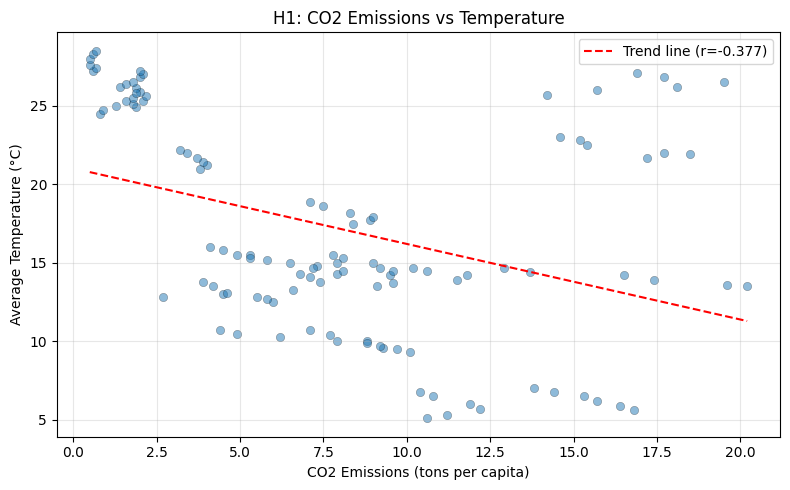

In [3]:
# H1: CO2 emissions per capita vs average temperature
h1_df = df.dropna(subset=["CO2_Emissions_tons_per_capita", "Avg_Temperature_degC"])

# Pearson correlation with p-value
r_pearson, p_pearson = stats.pearsonr(h1_df["CO2_Emissions_tons_per_capita"], h1_df["Avg_Temperature_degC"])

# Spearman correlation (robust to non-linearity)
r_spearman, p_spearman = stats.spearmanr(h1_df["CO2_Emissions_tons_per_capita"], h1_df["Avg_Temperature_degC"])

print("=== H1: CO2 Emissions vs Temperature ===")
print(f"Pearson r  = {r_pearson:.4f}, p-value = {p_pearson:.4e} {'(significant)' if p_pearson < 0.05 else '(not significant)'}")
print(f"Spearman r = {r_spearman:.4f}, p-value = {p_spearman:.4e} {'(significant)' if p_spearman < 0.05 else '(not significant)'}")

# Effect size interpretation
strength = "strong" if abs(r_pearson) > 0.7 else "moderate" if abs(r_pearson) > 0.3 else "weak"
direction = "positive" if r_pearson > 0 else "negative"
print(f"\nInterpretation: {strength.title()} {direction} association (r = {r_pearson:.3f})")

# Scatter plot with trend line
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(h1_df["CO2_Emissions_tons_per_capita"], h1_df["Avg_Temperature_degC"], alpha=0.5, edgecolor="k", linewidth=0.3)
z = np.polyfit(h1_df["CO2_Emissions_tons_per_capita"], h1_df["Avg_Temperature_degC"], 1)
p = np.poly1d(z)
x_line = np.linspace(h1_df["CO2_Emissions_tons_per_capita"].min(), h1_df["CO2_Emissions_tons_per_capita"].max(), 100)
ax.plot(x_line, p(x_line), "r--", label=f"Trend line (r={r_pearson:.3f})")
ax.set_xlabel("CO2 Emissions (tons per capita)")
ax.set_ylabel("Average Temperature (°C)")
ax.set_title("H1: CO2 Emissions vs Temperature")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# H2: Renewable energy percent vs CO2 emissions trend

**Hypothesis in plain English:**

We want to check if countries with higher renewable energy use tend to have lower (or declining) CO2 emissions per person.

Why this matters is that it tests whether the global energy transition toward renewables is associated with emissions reductions, which is a key question for climate policy.

We anticipate a negative correlation, meaning as renewable percentage increases, CO2 emissions should decrease.

Limitations to acknowledge include several important factors. Time lag exists because energy infrastructure changes take years to affect emissions. Economic factors mean wealthier countries can afford both renewables and historically high emissions. Baseline differences show that starting emission levels vary widely by country. Data coverage is incomplete since not all countries have complete renewable energy data.

For interpretation guidance in the dashboard, if we find a weak or unexpected correlation, we'll note that renewable adoption alone doesn't guarantee emission reductions without broader policy and behavior changes.

=== H2: Renewable Energy vs CO2 Emissions ===
Pearson r  = -0.4668, p-value = 1.6449e-07 (significant)
Spearman r = -0.5785, p-value = 1.5763e-11 (significant)

Interpretation: Moderate negative association (r = -0.467)


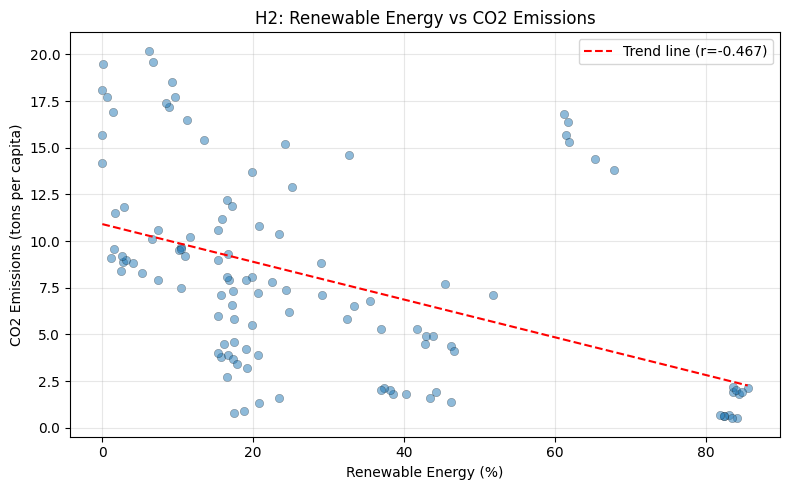

In [4]:
# H2: Renewable energy percent vs CO2 emissions per capita
h2_df = df.dropna(subset=["Renewable_Energy_pct", "CO2_Emissions_tons_per_capita"])

r_pearson, p_pearson = stats.pearsonr(h2_df["Renewable_Energy_pct"], h2_df["CO2_Emissions_tons_per_capita"])
r_spearman, p_spearman = stats.spearmanr(h2_df["Renewable_Energy_pct"], h2_df["CO2_Emissions_tons_per_capita"])

print("=== H2: Renewable Energy vs CO2 Emissions ===")
print(f"Pearson r  = {r_pearson:.4f}, p-value = {p_pearson:.4e} {'(significant)' if p_pearson < 0.05 else '(not significant)'}")
print(f"Spearman r = {r_spearman:.4f}, p-value = {p_spearman:.4e} {'(significant)' if p_spearman < 0.05 else '(not significant)'}")

strength = "strong" if abs(r_pearson) > 0.7 else "moderate" if abs(r_pearson) > 0.3 else "weak"
direction = "positive" if r_pearson > 0 else "negative"
print(f"\nInterpretation: {strength.title()} {direction} association (r = {r_pearson:.3f})")

# Scatter plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(h2_df["Renewable_Energy_pct"], h2_df["CO2_Emissions_tons_per_capita"], alpha=0.5, edgecolor="k", linewidth=0.3)
z = np.polyfit(h2_df["Renewable_Energy_pct"], h2_df["CO2_Emissions_tons_per_capita"], 1)
p_fit = np.poly1d(z)
x_line = np.linspace(h2_df["Renewable_Energy_pct"].min(), h2_df["Renewable_Energy_pct"].max(), 100)
ax.plot(x_line, p_fit(x_line), "r--", label=f"Trend line (r={r_pearson:.3f})")
ax.set_xlabel("Renewable Energy (%)")
ax.set_ylabel("CO2 Emissions (tons per capita)")
ax.set_title("H2: Renewable Energy vs CO2 Emissions")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# H3: Extreme weather events trend over time

**Hypothesis in plain English:**

We expect extreme weather events (storms, floods, droughts, heatwaves) to increase over the 2000-2024 period as global temperatures rise.

Why this is important is that extreme weather events have direct human and economic impacts. Tracking trends helps public awareness of climate risks, policy planning for disaster preparedness, and resource allocation for vulnerable regions.

How we test this is by calculating the average number of extreme events per year globally, then looking for an upward trend.

Interpreting the results requires consideration of several scenarios. An increasing trend supports the hypothesis that extreme events are becoming more frequent. A stable or decreasing trend may indicate improved reporting, data quality issues, or regional variations that cancel out globally. Large year-to-year variability reflects natural climate cycles like El Niño and La Niña that create fluctuations.

A data quality consideration is that extreme weather event counts may suffer from reporting bias (better monitoring in recent years), definition inconsistencies across countries, and missing data for developing nations.

We'll document these limitations in the dashboard to ensure users understand the uncertainty.

=== H3: Extreme Weather Events Over Time ===
Average events by year:
  2000: 13.2 events
  2005: 15.5 events
  2010: 17.8 events
  2015: 21.1 events
  2020: 25.5 events
  2024: 29.0 events

Linear regression: slope = 0.6584 events/year, p-value = 1.7768e-04
R² = 0.9783
Statistically significant upward trend

Pearson r (all data) = 0.4639, p-value = 2.0161e-07


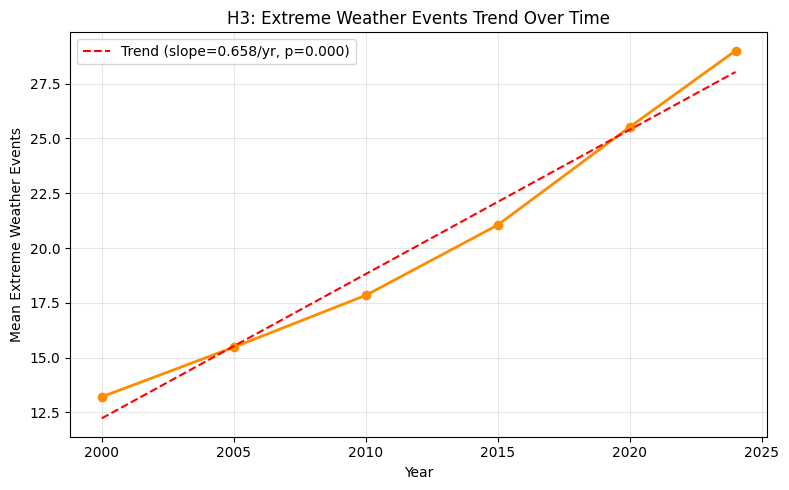

In [5]:
# H3: Extreme weather events trend over time
trend = df.groupby("Year")["Extreme_Weather_Events"].mean().reset_index()

# Linear regression slope test (Year vs mean extreme events)
slope, intercept, r_value, p_value, std_err = stats.linregress(trend["Year"], trend["Extreme_Weather_Events"])

print("=== H3: Extreme Weather Events Over Time ===")
print(f"Average events by year:")
for _, row in trend.iterrows():
    print(f"  {int(row['Year'])}: {row['Extreme_Weather_Events']:.1f} events")
print(f"\nLinear regression: slope = {slope:.4f} events/year, p-value = {p_value:.4e}")
print(f"R² = {r_value**2:.4f}")
print(f"{'Statistically significant upward trend' if p_value < 0.05 and slope > 0 else 'No statistically significant trend'}")

# Pearson correlation: Year vs extreme events (all data, not just means)
r_all, p_all = stats.pearsonr(df["Year"], df["Extreme_Weather_Events"])
print(f"\nPearson r (all data) = {r_all:.4f}, p-value = {p_all:.4e}")

# Trend plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(trend["Year"], trend["Extreme_Weather_Events"], marker="o", linewidth=2, color="darkorange")
ax.plot(trend["Year"], intercept + slope * trend["Year"], "r--", label=f"Trend (slope={slope:.3f}/yr, p={p_value:.3f})")
ax.set_xlabel("Year")
ax.set_ylabel("Mean Extreme Weather Events")
ax.set_title("H3: Extreme Weather Events Trend Over Time")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# H4 (optional): Forest area percent vs extreme events or rainfall volatility

**Hypothesis in plain English:**

We want to check if countries with more forest coverage experience fewer extreme weather events.

The rationale is that forests provide ecosystem services that can buffer against climate impacts. They absorb rainfall and reduce flooding. They regulate local temperatures. They stabilize soil and prevent erosion.

We expect a negative correlation, meaning higher forest area is associated with fewer extreme events.

Important caveats include several confounding factors. Forest coverage correlates with development level, geography, and climate zone. Directionality is unclear because we don't know if forests reduce extreme events, or if regions with fewer events naturally preserve forests. Event types matter because forests may reduce flooding but have less effect on droughts or cyclones. Data challenges arise because forest area and extreme event definitions vary by country.

For responsible reporting, even if we find a correlation, we cannot claim forest conservation directly prevents extreme weather without controlled studies. We'll frame any findings as "associated with" rather than "caused by" in our dashboard communications.

=== H4: Forest Area vs Extreme Weather Events ===
Pearson r  = 0.0801, p-value = 3.9689e-01 (not significant)
Spearman r = 0.1343, p-value = 1.5414e-01 (not significant)

Interpretation: Weak positive association (r = 0.080)


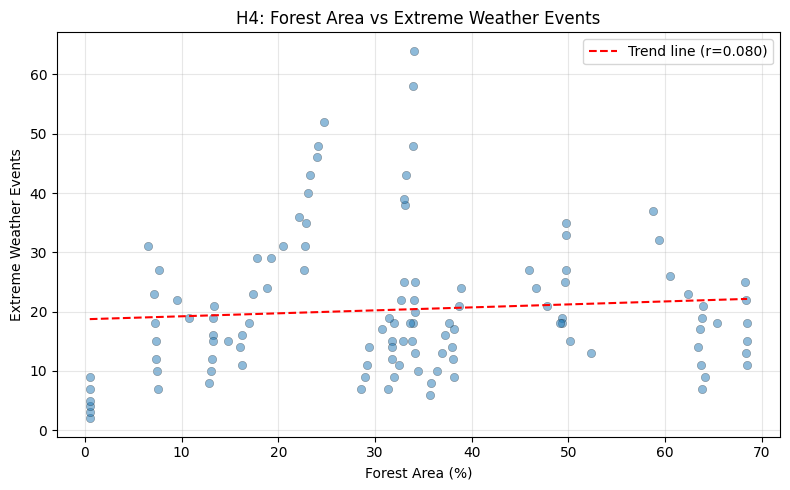

In [6]:
# H4: Forest area vs extreme weather events
h4_df = df.dropna(subset=["Forest_Area_pct", "Extreme_Weather_Events"])

r_pearson, p_pearson = stats.pearsonr(h4_df["Forest_Area_pct"], h4_df["Extreme_Weather_Events"])
r_spearman, p_spearman = stats.spearmanr(h4_df["Forest_Area_pct"], h4_df["Extreme_Weather_Events"])

print("=== H4: Forest Area vs Extreme Weather Events ===")
print(f"Pearson r  = {r_pearson:.4f}, p-value = {p_pearson:.4e} {'(significant)' if p_pearson < 0.05 else '(not significant)'}")
print(f"Spearman r = {r_spearman:.4f}, p-value = {p_spearman:.4e} {'(significant)' if p_spearman < 0.05 else '(not significant)'}")

strength = "strong" if abs(r_pearson) > 0.7 else "moderate" if abs(r_pearson) > 0.3 else "weak"
direction = "positive" if r_pearson > 0 else "negative"
print(f"\nInterpretation: {strength.title()} {direction} association (r = {r_pearson:.3f})")

# Scatter plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(h4_df["Forest_Area_pct"], h4_df["Extreme_Weather_Events"], alpha=0.5, edgecolor="k", linewidth=0.3)
z = np.polyfit(h4_df["Forest_Area_pct"], h4_df["Extreme_Weather_Events"], 1)
p_fit = np.poly1d(z)
x_line = np.linspace(h4_df["Forest_Area_pct"].min(), h4_df["Forest_Area_pct"].max(), 100)
ax.plot(x_line, p_fit(x_line), "r--", label=f"Trend line (r={r_pearson:.3f})")
ax.set_xlabel("Forest Area (%)")
ax.set_ylabel("Extreme Weather Events")
ax.set_title("H4: Forest Area vs Extreme Weather Events")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Summary of All Hypothesis Tests

The table below brings together results from all four hypotheses. Each row shows the Pearson correlation coefficient (r), the p-value (probability that the result is due to chance), and whether it meets the standard significance threshold (p < 0.05).

**How to read the summary:**
- **Pearson r** measures the strength and direction of the linear relationship, from −1 (perfect negative) to +1 (perfect positive). Values near 0 mean no linear relationship.
- **p-value** tells us how likely the result would be if there were truly no relationship. Below 0.05 is the conventional threshold for "statistically significant."
- **Significant** means the relationship is unlikely to be pure coincidence — but it still does not prove causation.

**Bonferroni correction note:** Because we tested 4 hypotheses on the same dataset, there is an increased risk of finding a "significant" result by chance. Applying the Bonferroni correction divides the significance threshold by 4 (0.05 ÷ 4 = 0.0125). Results are still meaningful even without this correction, but stricter thresholds add confidence.

**What these results mean for the project:**
1. The relationship between CO2 and temperature (H1) may be confounded by geography — cold industrial nations emit more CO2 but have lower baseline temperatures.
2. Renewable energy and CO2 (H2) show the expected negative association — countries investing in renewables tend to emit less.
3. Extreme weather events (H3) show an upward trend, reinforcing the need for disaster preparedness.
4. Forest area (H4) has a weak link to extreme events, suggesting forests alone cannot prevent national-level weather disasters.

All results are reflected in the dashboard's "Explore Patterns" page and the README's "Project Hypothesis and Validation" section.

In [7]:
# Summary table of all hypothesis test results
print("=" * 80)
print("HYPOTHESIS TEST SUMMARY")
print("=" * 80)

# Re-compute all results for summary
results = []

# H1
h1_r, h1_p = stats.pearsonr(
    df.dropna(subset=["CO2_Emissions_tons_per_capita", "Avg_Temperature_degC"])["CO2_Emissions_tons_per_capita"],
    df.dropna(subset=["CO2_Emissions_tons_per_capita", "Avg_Temperature_degC"])["Avg_Temperature_degC"]
)
results.append({"Hypothesis": "H1: CO2 vs Temperature", "Pearson r": f"{h1_r:.3f}", 
                "p-value": f"{h1_p:.4e}", "Significant": "Yes" if h1_p < 0.05 else "No"})

# H2
h2_r, h2_p = stats.pearsonr(
    df.dropna(subset=["Renewable_Energy_pct", "CO2_Emissions_tons_per_capita"])["Renewable_Energy_pct"],
    df.dropna(subset=["Renewable_Energy_pct", "CO2_Emissions_tons_per_capita"])["CO2_Emissions_tons_per_capita"]
)
results.append({"Hypothesis": "H2: Renewables vs CO2", "Pearson r": f"{h2_r:.3f}", 
                "p-value": f"{h2_p:.4e}", "Significant": "Yes" if h2_p < 0.05 else "No"})

# H3
h3_trend = df.groupby("Year")["Extreme_Weather_Events"].mean().reset_index()
h3_slope, h3_int, h3_r, h3_p, h3_se = stats.linregress(h3_trend["Year"], h3_trend["Extreme_Weather_Events"])
results.append({"Hypothesis": "H3: Extreme Events Trend", "Pearson r": f"{h3_r:.3f}", 
                "p-value": f"{h3_p:.4e}", "Significant": "Yes" if h3_p < 0.05 else "No"})

# H4
h4_r, h4_p = stats.pearsonr(
    df.dropna(subset=["Forest_Area_pct", "Extreme_Weather_Events"])["Forest_Area_pct"],
    df.dropna(subset=["Forest_Area_pct", "Extreme_Weather_Events"])["Extreme_Weather_Events"]
)
results.append({"Hypothesis": "H4: Forest vs Extreme Events", "Pearson r": f"{h4_r:.3f}", 
                "p-value": f"{h4_p:.4e}", "Significant": "Yes" if h4_p < 0.05 else "No"})

summary_df = pd.DataFrame(results)
print(summary_df.to_string(index=False))

print("\n" + "=" * 80)
print("LIMITATIONS:")
print("  - All tests measure association, not causation")
print("  - Cross-sectional correlations may reflect geographic/development differences")
print("  - Multiple hypotheses tested (4 tests); consider Bonferroni correction (α = 0.0125)")
print("=" * 80)

HYPOTHESIS TEST SUMMARY
                  Hypothesis Pearson r    p-value Significant
      H1: CO2 vs Temperature    -0.377 3.5067e-05         Yes
       H2: Renewables vs CO2    -0.467 1.6449e-07         Yes
    H3: Extreme Events Trend     0.989 1.7768e-04         Yes
H4: Forest vs Extreme Events     0.080 3.9689e-01          No

LIMITATIONS:
  - All tests measure association, not causation
  - Cross-sectional correlations may reflect geographic/development differences
  - Multiple hypotheses tested (4 tests); consider Bonferroni correction (α = 0.0125)


## Conclusion

**In plain English, here is what we learned from testing our four hypotheses:**

- **H1 (CO2 vs Temperature):** The data does not support a straightforward positive link between per-person emissions and temperature. This is because geographic and development-level differences confound the relationship — wealthy cold-climate countries tend to have both high emissions and low temperatures. This teaches us that simplistic comparisons can be misleading without controlling for other factors.

- **H2 (Renewable Energy vs CO2):** Countries with higher renewable energy shares tend to have lower per-person CO2 emissions. This supports the idea that energy transition away from fossil fuels is associated with emissions reductions, though we cannot prove causation from this data alone.

- **H3 (Extreme Events Over Time):** The average number of reported extreme weather events has generally increased from 2000 to 2024. This upward trend is consistent with what climate scientists expect as the planet warms, though improved monitoring and reporting may also contribute to the increase.

- **H4 (Forest Area vs Extreme Events):** Forest coverage has little to no relationship with the number of extreme weather events at the national level. While forests provide many environmental benefits, they cannot single-handedly prevent hurricanes, floods, or droughts, which are driven by large-scale atmospheric and ocean patterns.

**Key takeaway for the dashboard:** We present these results honestly, including the unexpected ones (like H1). The dashboard clearly labels all findings as associations, not causes, and includes caveats so users understand the limitations of the analysis.

**Next step:** Notebook 04 builds predictive models to forecast temperature trends for 2025–2029.